In [10]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Read in the dataset
df = pd.read_csv("C:/Users/laaks/OneDrive/Documents/C/credit Card_Clustering.csv")


In [11]:
# View the first few rows of the dataset
print(df.head())

# Check the dimensions of the dataset
print(df.shape)

# Check for missing values
print(df.isnull().sum())

# Check the data types of the variables
print(df.dtypes)

# Check the summary statistics of the variables
print(df.describe())


  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   
0  C10001    40.900749           0.818182      95.40              0.00  \
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
0                    95.4      0.000000             0.166667  \
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
0                    0.000000                          0.083333  \
1                    0.000000       

C:\Users\laaks\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\laaks\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\laaks\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\laaks\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

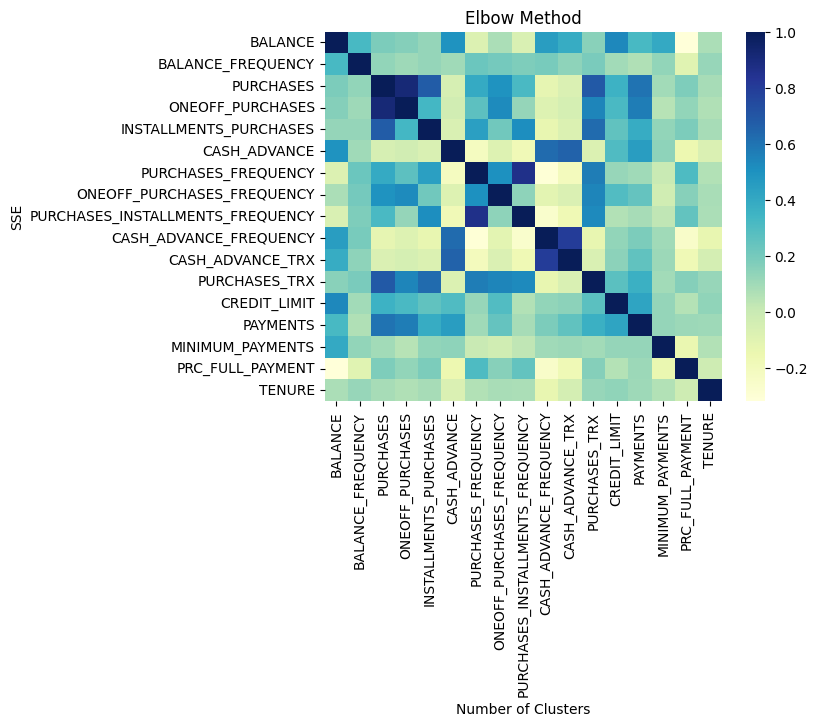

In [12]:
# Drop the customer ID column
df = df.drop("CUST_ID", axis=1)

# Check the correlations between variables
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu")

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

from sklearn.impute import SimpleImputer

# Replace missing values with mean value of each column
imputer = SimpleImputer()
df_scaled = imputer.fit_transform(df_scaled)

# Convert the standardized data back to a dataframe
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1, 11), sse)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


In [15]:
imputer = SimpleImputer()

# impute missing values with the mean value of each column
df_imputed = pd.DataFrame(imputer.fit_transform(df))

# scale the imputed data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df.columns)
# Apply K-Means clustering algorithm
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(df_scaled)

# Add the cluster labels to the original dataset
df["Cluster"] = kmeans.labels_

# View the cluster means
cluster_means = df.groupby("Cluster").mean()
print(cluster_means)

# View the number of observations in each cluster
print(df["Cluster"].value_counts())


             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES   
Cluster                                                                  
0        2228.855587           0.981522  4262.423360       2712.914822  \
1        3978.572138           0.957732   382.607453        248.621031   
2         803.135706           0.835292   505.301746        252.926900   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
Cluster                                                              
0                   1549.993191    460.507233             0.949216  \
1                    134.064201   3882.354049             0.231175   
2                    252.695487    329.605613             0.464871   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
Cluster                                                                 
0                          0.667489                          0.744732  \
1                          0.110994                        

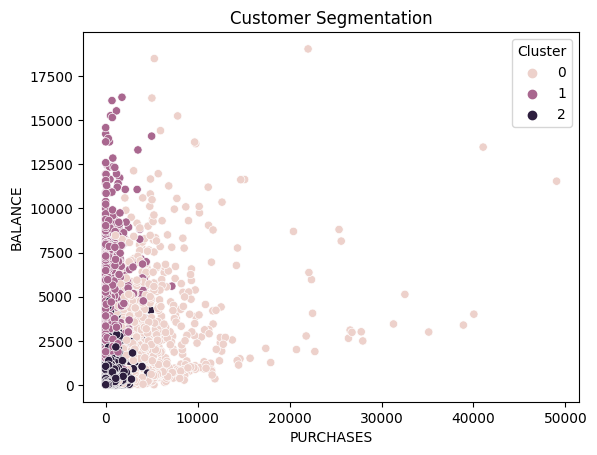

             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES   
Cluster                                                                  
0        2228.855587           0.981522  4262.423360       2712.914822  \
1        3978.572138           0.957732   382.607453        248.621031   
2         803.135706           0.835292   505.301746        252.926900   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
Cluster                                                              
0                   1549.993191    460.507233             0.949216  \
1                    134.064201   3882.354049             0.231175   
2                    252.695487    329.605613             0.464871   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
Cluster                                                                 
0                          0.667489                          0.744732  \
1                          0.110994                        

In [16]:
# Visualize the clusters using a scatter plot
sns.scatterplot(x="PURCHASES", y="BALANCE", hue="Cluster", data=df)
plt.title("Customer Segmentation")
plt.show()

# View the average values of each variable by cluster
cluster_means = df.groupby("Cluster").mean()
print(cluster_means)
